In [120]:
#Imports
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
pd.set_option('display.max_columns', None)

In [88]:
#Read CSV into Python
df = pd.read_csv('2022season.csv')

In [104]:
#Look at the top of the dataframe to get a general idea
df.head()

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,playerid
0,Aaron Judge,NYY,157,696,62,133,131,16,15.9,25.1,0.375,0.340,0.311,0.425,0.686,0.458,0.463,207,2.1,86.1,0.5,11.4,15640
1,Manny Machado,SDP,150,644,32,100,102,9,9.8,20.7,0.234,0.337,0.298,0.366,0.531,0.382,0.338,152,3.0,41.9,6.9,7.4,11493
2,Nolan Arenado,STL,148,620,30,73,103,5,8.4,11.6,0.241,0.290,0.293,0.358,0.533,0.381,0.339,151,-1.6,35.3,13.5,7.3,9777
3,Paul Goldschmidt,STL,151,651,35,106,115,7,12.1,21.7,0.260,0.368,0.317,0.404,0.578,0.419,0.367,177,3.0,61.6,-15.8,7.1,9218
4,Freddie Freeman,LAD,159,708,21,117,100,13,11.9,14.4,0.186,0.359,0.325,0.407,0.511,0.393,0.403,157,5.4,52.6,-8.8,7.1,5361


In [96]:
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()

,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,playerid
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.00000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,144.461538,597.446154,20.076923,74.476923,71.846154,8.907692,8.710000,19.928462,0.172854,0.295492,0.25830,0.329769,0.431154,0.331231,0.328277,115.323077,0.284615,11.383846,-2.224615,3.018462,14988.176923
std,10.479329,57.712340,9.636506,16.513192,19.554123,8.823371,2.810828,5.235023,0.050847,0.033646,0.02829,0.032079,0.060656,0.032543,0.032101,23.378654,3.596972,16.762170,10.078237,2.103883,5007.944424
min,118.000000,505.000000,0.000000,34.000000,32.000000,0.000000,3.300000,7.100000,0.052000,0.209000,0.18400,0.239000,0.273000,0.245000,0.267000,57.000000,-7.300000,-24.600000,-26.700000,-0.900000,2396.000000
25%,136.000000,550.250000,14.000000,62.000000,58.000000,2.000000,6.800000,16.425000,0.141000,0.275250,0.24000,0.308000,0.393000,0.311000,0.306500,101.250000,-2.500000,0.525000,-10.100000,1.500000,11737.500000
50%,145.000000,590.000000,18.000000,72.000000,69.000000,6.000000,8.650000,19.200000,0.169000,0.295000,0.25750,0.326000,0.427000,0.328000,0.326000,113.500000,-0.200000,11.250000,-2.800000,2.700000,15504.500000
75%,152.750000,644.000000,27.000000,85.750000,84.000000,13.750000,10.275000,24.100000,0.206500,0.319750,0.27600,0.349000,0.465750,0.350000,0.346500,129.000000,3.000000,20.775000,4.175000,4.175000,18394.000000
max,162.000000,724.000000,62.000000,133.000000,131.000000,35.000000,20.300000,34.300000,0.375000,0.368000,0.32600,0.425000,0.686000,0.458000,0.463000,207.000000,8.400000,86.100000,22.300000,11.400000,27506.000000


In [91]:
#Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      130 non-null    object 
 1   Team      130 non-null    object 
 2   G         130 non-null    int64  
 3   PA        130 non-null    int64  
 4   HR        130 non-null    int64  
 5   R         130 non-null    int64  
 6   RBI       130 non-null    int64  
 7   SB        130 non-null    int64  
 8   BB%       130 non-null    object 
 9   K%        130 non-null    object 
 10  ISO       130 non-null    float64
 11  BABIP     130 non-null    float64
 12  AVG       130 non-null    float64
 13  OBP       130 non-null    float64
 14  SLG       130 non-null    float64
 15  wOBA      130 non-null    float64
 16  xwOBA     130 non-null    float64
 17  wRC+      130 non-null    int64  
 18  BsR       130 non-null    float64
 19  Off       130 non-null    float64
 20  Def       130 non-null    float6

In [92]:
#Change the two columns that should not be objects, to floats
df['BB%'] = df['BB%'].str[:-1].astype(float)
df['K%'] = df['K%'].str[:-1].astype(float)

In [112]:
#Look at how many columns and rows there are
df.shape

(130, 23)

In [95]:
#Where are there NAs located
df.isnull().sum()

Name        0
Team        0
G           0
PA          0
HR          0
R           0
RBI         0
SB          0
BB%         0
K%          0
ISO         0
BABIP       0
AVG         0
OBP         0
SLG         0
wOBA        0
xwOBA       0
wRC+        0
BsR         0
Off         0
Def         0
WAR         0
playerid    0
dtype: int64

Part 1:
Using matplotlib, create two or more plots that incorporate at least 5 of the following properties:

In [137]:
#Look at top 30 players by 'WAR'
df = df.head(31)
df

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,playerid
0,Aaron Judge,NYY,157,696,62,133,131,16,15.9,25.1,0.375,0.340,0.311,0.425,0.686,0.458,0.463,207,2.1,86.1,0.5,11.4,15640
1,Manny Machado,SDP,150,644,32,100,102,9,9.8,20.7,0.234,0.337,0.298,0.366,0.531,0.382,0.338,152,3.0,41.9,6.9,7.4,11493
2,Nolan Arenado,STL,148,620,30,73,103,5,8.4,11.6,0.241,0.290,0.293,0.358,0.533,0.381,0.339,151,-1.6,35.3,13.5,7.3,9777
3,Paul Goldschmidt,STL,151,651,35,106,115,7,12.1,21.7,0.260,0.368,0.317,0.404,0.578,0.419,0.367,177,3.0,61.6,-15.8,7.1,9218
4,Freddie Freeman,LAD,159,708,21,117,100,13,11.9,14.4,0.186,0.359,0.325,0.407,0.511,0.393,0.403,157,5.4,52.6,-8.8,7.1,5361
5,Francisco Lindor,NYM,161,706,26,98,107,16,8.4,18.8,0.179,0.301,0.270,0.339,0.449,0.342,0.331,127,3.3,25.4,15.9,6.8,12916
6,Yordan Alvarez,HOU,135,561,37,95,97,1,13.9,18.9,0.306,0.320,0.306,0.406,0.613,0.427,0.462,185,-0.6,52.8,-7.5,6.6,19556
7,Mookie Betts,LAD,142,639,35,117,82,12,8.6,16.3,0.264,0.272,0.269,0.340,0.533,0.373,0.344,144,4.3,37.2,4.1,6.6,13611
8,Jose Altuve,HOU,141,604,28,103,57,18,10.9,14.4,0.233,0.315,0.300,0.387,0.533,0.397,0.354,164,-1.5,41.8,1.6,6.6,5417
9,J.T. Realmuto,PHI,139,562,22,75,84,21,7.3,21.2,0.202,0.318,0.276,0.342,0.478,0.354,0.351,128,6.6,24.9,18.0,6.5,11739


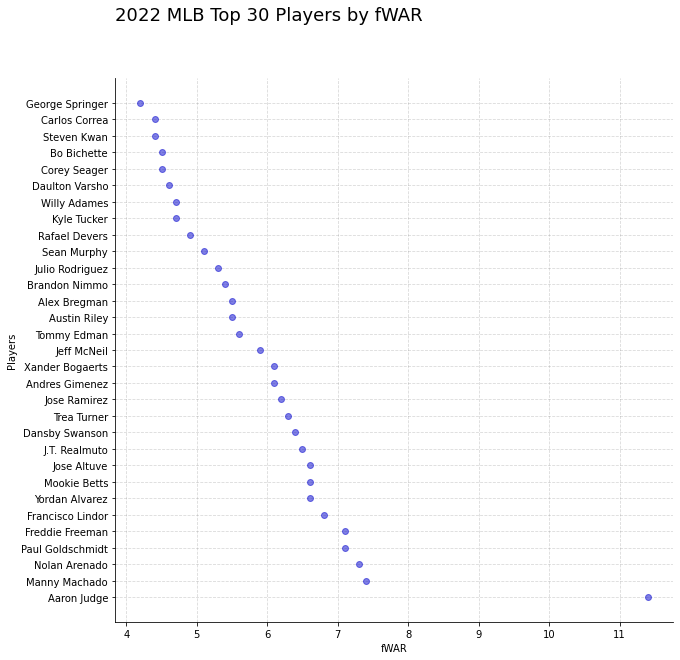

In [169]:
x = df['WAR']
y = df['Name']
fig, ax = plt.subplots(1, figsize=(10,10))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.scatter(x, y, color='#0000CC', alpha = .5)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
plt.suptitle('2022 MLB Top 30 Players by fWAR', x=0.125, y=0.98, ha='left', fontsize=18)
plt.ylabel('Players')
plt.xlabel('fWAR')
plt.show()

Above is a graph showing the top 30 players in baseball ranked by fWAR. WAR measures a player's value in all facets of the game by deciphering how many more wins he's worth than a replacement-level player at his same position (e.g., a Minor League replacement or a readily available fill-in free agent). fWAR is fangraphs calculation of WAR.

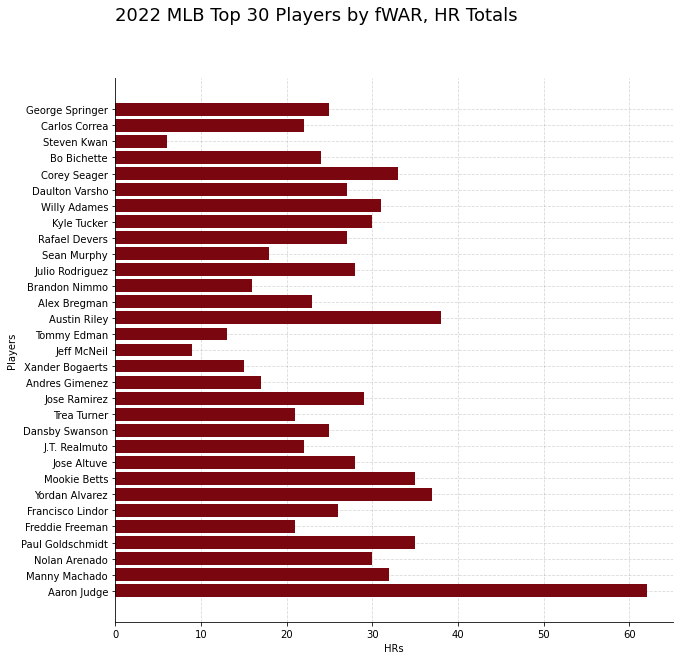

In [180]:
x = df['Name']
y = df['HR']
fig, ax = plt.subplots(1, figsize=(10,10))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.barh(x, y, color='#7a070f')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
plt.suptitle('2022 MLB Top 30 Players by fWAR, HR Totals', x=0.125, y=0.98, ha='left', fontsize=18)
plt.ylabel('Players')
plt.xlabel('HRs')
plt.show()

Above is a graph showing the top 30 players in baseball ranked by fWAR, but it shows how many homeruns they hit. 

Part 2:
Recreate the visualizations above using the Seaborn library as best as possible.

[Text(0.5, 1.0, '2022 MLB Top 30 Players by fWAR')]

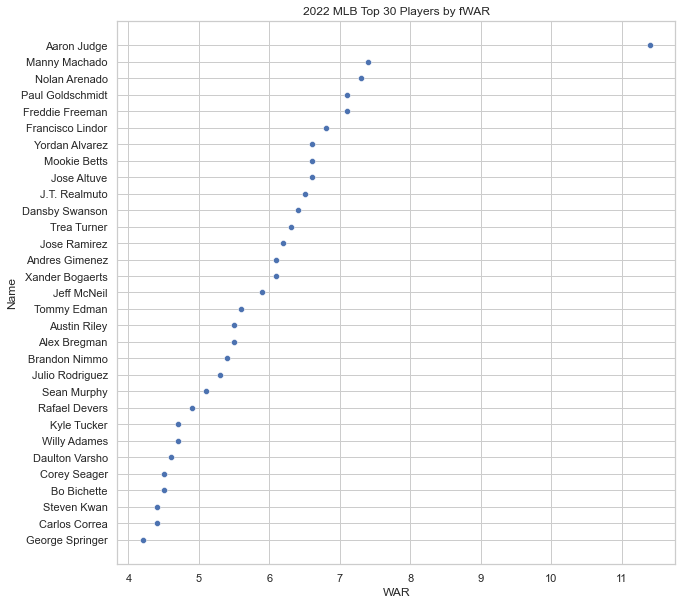

In [213]:
sns.set(style='whitegrid', rc={'figure.figsize':(10,10)})
sns.scatterplot(x=df['WAR'],y=df['Name'], palette='blue').set(title='2022 MLB Top 30 Players by fWAR')

Above is a graph showing the top 30 players in baseball ranked by fWAR. WAR measures a player's value in all facets of the game by deciphering how many more wins he's worth than a replacement-level player at his same position (e.g., a Minor League replacement or a readily available fill-in free agent). fWAR is fangraphs calculation of WAR.

[Text(0.5, 1.0, '2022 MLB Top 30 Players by fWAR, HR Totals')]

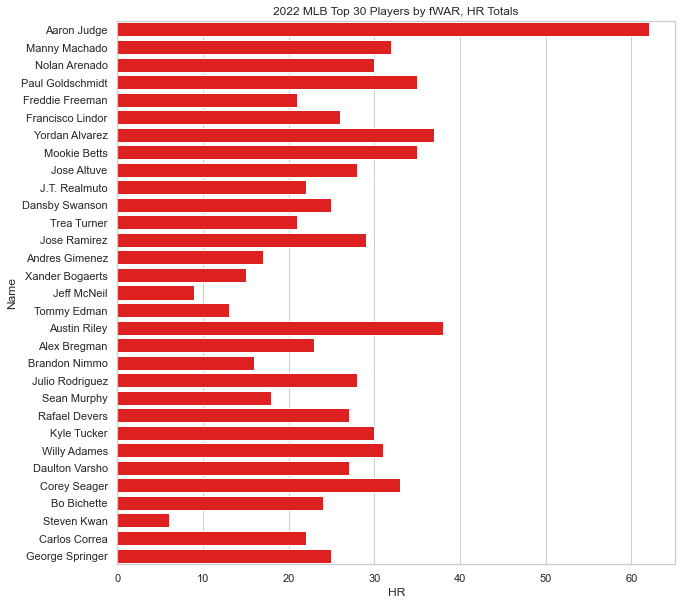

In [220]:
sns.set(style='whitegrid', rc={'figure.figsize':(10,10)})
sns.barplot(x=df['HR'],y=df['Name'], color = 'Red').set(title='2022 MLB Top 30 Players by fWAR, HR Totals')

Above is a graph showing the top 30 players in baseball ranked by fWAR, but it shows how many homeruns they hit. 

Part 3:
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.

Matplotlib is mainly deployed for basic plotting. Visualization using Matplotlib generally consists of bars, pies, lines, scatter plots and so on. Seaborn, on the other hand, provides a variety of visualization patterns. It uses fewer syntax and has easily interesting default themes. It specializes in statistics visualization and is used if one has to summarize data in visualizations and also show the distribution in the data.

Conclusions
After exploring your dataset, provide a short summary of what you noticed from this dataset.

The most obvious conclusion found from this dataset was how incredible Aaron Judge's 2022 season was compared to all the other amazing players. He had 16 more homeruns than the next closest player in all of baseball. His fWAR was a full 4.0 wins more than the next guy. 4 fWAR by itself is a  good player! Judge hit 62 home runs this season, breaking Maris’ American League record. He finished just shy of winning the Triple Crown and led the majors in runs, home runs, on-base percentage, slugging percentage, OPS, extra-base hits and total bases, all while taking over as the Yankees’ everyday center fielder. He did it all while propping up a Yankees team that slumped badly down the stretch and carried them to the American League East title. An unbelievable year.